In [1]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
#User Inputs
epoch = 25
img_size = 784
output_classes = 10
batch_size = 128
train_size = 60000
test_size = 10000

In [3]:
#Prepare dataset
(TrainData , TrainLabels) ,(TestData , TestLabels) = mnist.load_data()
TrainData.shape

(60000, 28, 28)

In [4]:
#reshape the dataset
TrainData = TrainData.reshape(train_size , img_size)
TrainData = TrainData.astype('float32')
TrainData = TrainData / 255

TestData = TestData.reshape(test_size , img_size)
TestData =TestData.astype('float32')
TestData = TestData/255

In [5]:
#Reshape target class with one hot encoding
encoded_TrainLabels = np_utils.to_categorical(TrainLabels)
encoded_TestLabels = np_utils.to_categorical(TestLabels)

In [6]:
#create a validation set
X = TrainData
y = encoded_TrainLabels
train_x,val_x,train_y,val_y = train_test_split(X,y,test_size = 0.2)

In [7]:
train_x.shape
val_x.shape

(12000, 784)

In [8]:
#Create the model
model = Sequential()
#layer_1
model.add(Dense(512,))
model.add(Activation('relu'))
model.add(Dropout(0.2))
#layer_2
model.add(Dense(512,))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(output_classes))
model.add(Activation('softmax'))


In [9]:
#Compile the model
model.compile(loss='categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])

In [10]:
#Fit the model
Trained_Model = model.fit(train_x,train_y,
                          validation_data =(val_x,val_y),
                          batch_size = batch_size ,
                          nb_epoch = epoch , verbose =2) 

/Users/bhartisharma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 48000 samples, validate on 12000 samples
Epoch 1/25
 - 7s - loss: 0.2758 - acc: 0.9176 - val_loss: 0.1245 - val_acc: 0.9607
Epoch 2/25
 - 7s - loss: 0.1142 - acc: 0.9651 - val_loss: 0.0962 - val_acc: 0.9711
Epoch 3/25
 - 7s - loss: 0.0783 - acc: 0.9754 - val_loss: 0.0782 - val_acc: 0.9773
Epoch 4/25
 - 8s - loss: 0.0619 - acc: 0.9799 - val_loss: 0.0686 - val_acc: 0.9804
Epoch 5/25
 - 7s - loss: 0.0490 - acc: 0.9839 - val_loss: 0.0772 - val_acc: 0.9776
Epoch 6/25
 - 7s - loss: 0.0423 - acc: 0.9863 - val_loss: 0.0676 - val_acc: 0.9817
Epoch 7/25
 - 7s - loss: 0.0362 - acc: 0.9875 - val_loss: 0.0695 - val_acc: 0.9803
Epoch 8/25
 - 7s - loss: 0.0312 - acc: 0.9897 - val_loss: 0.0786 - val_acc: 0.9784
Epoch 9/25
 - 7s - loss: 0.0264 - acc: 0.9909 - val_loss: 0.0820 - val_acc: 0.9783
Epoch 10/25
 - 7s - loss: 0.0295 - acc: 0.9902 - val_loss: 0.0771 - val_acc: 0.9810
Epoch 11/25
 - 6s - loss: 0.0250 - acc: 0.9913 - val_loss: 0.0788 - val_acc: 0.9805
Epoch 12/25
 - 7s - loss: 0.0202 - 

In [11]:
#model Evaluation

#Print history keys
print(Trained_Model.history.keys())

#Evaluate Model
scores = model.evaluate(val_x,val_y,verbose = 0)

print("Test Score",scores[0])
print("Test Accuracy",scores[1])

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
Test Score 0.09104111480819013
Test Accuracy 0.9818333333333333


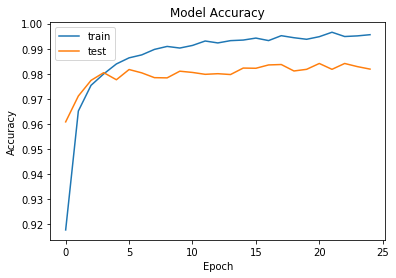

In [12]:
#history plot for acc and val_acc
plt.plot(Trained_Model.history['acc'])
plt.plot(Trained_Model.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

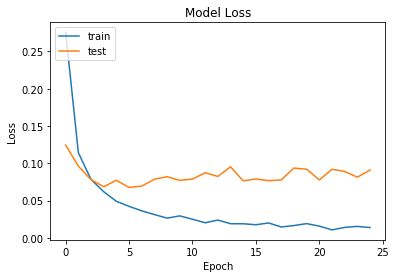

In [13]:
#History plot for loss and val_loss
plt.plot(Trained_Model.history['loss'])
plt.plot(Trained_Model.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

[2]
[1]
[0]
[4]


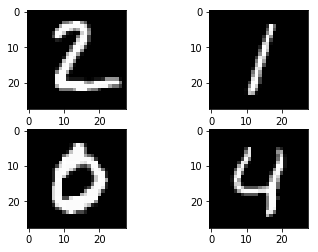

In [14]:
#Model Testing
#taking some images from test data
test_images = TestData[1:5]

# reshape the test images to standard 28x28 format
test_images = test_images.reshape(test_images.shape[0], 28, 28)


# loop over each of the test images
for i, test_image in enumerate(test_images, start=1):
    # grab a copy of test image for viewing
    org_image = test_image
    # reshape the test image to [1x784] format so that our model understands
    test_image = test_image.reshape(1,784)
    prediction = model.predict_classes(test_image,verbose=0)
    print(prediction)
    # display the prediction and image
    plt.subplot(220+i)
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

